# Init

In [1]:
%matplotlib inline

from pathlib import Path

import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from tqdm.auto import tqdm

import corewaeasy as cowasy

# Explore the entire database

I had to modify the 'watpy/coredb/coredb.py' module to force git to ignore the SSL auto-signed certificate from the source, since it was a pain in the ass to understand how to make it work. I just added to the environmen variables `GIT_SSL_NO_VERIFY=true` when calling `git clone` through their custom function `coredb.runcmd` by adding a kwarg 'env' passed to the actual kwarg 'env' of python's `subprocess.Popen`.

Scheme:
```
myenv = os.environ.copy()
myenv['GIT_SSL_NO_VERIFY'] = 'true'
runcmd(..., env=myenv)  # which calls Popen(..., env=env)
```

In [2]:
cdb = cowasy.CoReManager('../../CoRe_DB_clone/')

Index found, updating...

git-pull core_database_index ...
 
done!


In [3]:
# show the database_key for each simulation
cdb[['id_eos', 'id_type', 'id_mass', 'id_mass_ratio', 'id_eccentricity', 'id_gw_frequency_Hz']]

,id_eos,id_type,id_mass,id_mass_ratio,id_eccentricity,id_gw_frequency_Hz
BAM:0001,2B,Irrotational,2.699952,1.000000,0.007093,454.5056
BAM:0002,2H,Irrotational,2.699957,1.000000,0.009810,454.6124
BAM:0003,ALF2,Irrotational,2.700033,1.000000,0.008908,454.7933
BAM:0004,ALF2,Irrotational,2.701928,1.000000,NaN,619.1953
BAM:0005,ALF2,CRV,2.750016,1.000000,0.006877,423.2855
...,...,...,...,...,...,...
THC:0103,BLh,Irrotational,2.900000,1.000000,NaN,340.2870
THC:0104,BLh,Irrotational,2.950000,1.000000,NaN,342.4120
THC:0105,BLh,Irrotational,2.741000,1.177125,NaN,283.0820
THC:0106,BLh,Irrotational,3.000000,1.000000,NaN,344.5040


In [4]:
# Show the metadata in the CoRe DB index for selected simulation:
database_key = 'BAM:0001'

cdb.metadata.loc[database_key]

database_key                                                             BAM:0001
available_runs                                                 R01, R02, R03, R04
simulation_name                                    2B_1.350_1.350_0.00_0.00_0.038
binary_type                                                                   BNS
reference_bibkeys                                                Bernuzzi:2014owa
id_code                                                                    LORENE
id_type                                                              Irrotational
id_mass                                                                  2.699952
id_rest_mass                                                             3.050133
id_mass_ratio                                                                 1.0
id_ADM_mass                                                              2.677624
id_ADM_angularmomentum                                                   7.662564
id_gw_frequency_

Use the method `CoRe_db.show` to plot histograms of any metadata available in the DB.

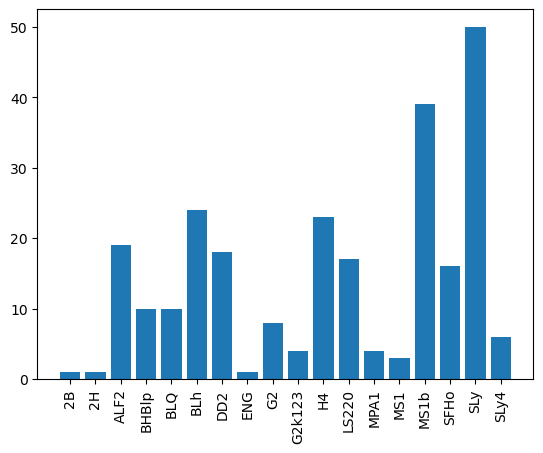

In [5]:
# EoS
fig = cdb.show('id_eos', False)

Text(0.5, 0, 'Mass')

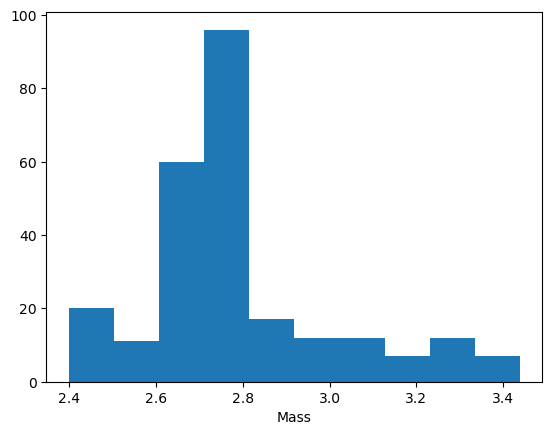

In [6]:
masses = cdb['id_mass']

fig, ax = plt.subplots()
hist, ticks, _ = ax.hist(masses, bins=10);
ax.set_xlabel('Mass')

# Chosen EoS / Classes

In [7]:
# Get list of all EoS available:
cdb.eos

{'2B',
 '2H',
 'ALF2',
 'BHBlp',
 'BLQ',
 'BLh',
 'DD2',
 'ENG',
 'G2',
 'G2k123',
 'H4',
 'LS220',
 'MPA1',
 'MS1',
 'MS1b',
 'SFHo',
 'SLy',
 'SLy4'}

Number of sims: 50


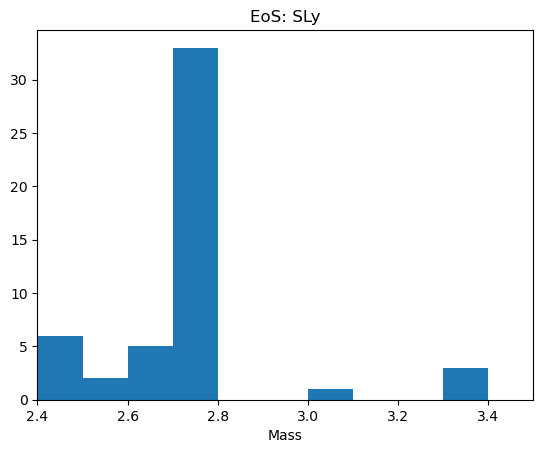

Number of sims: 39


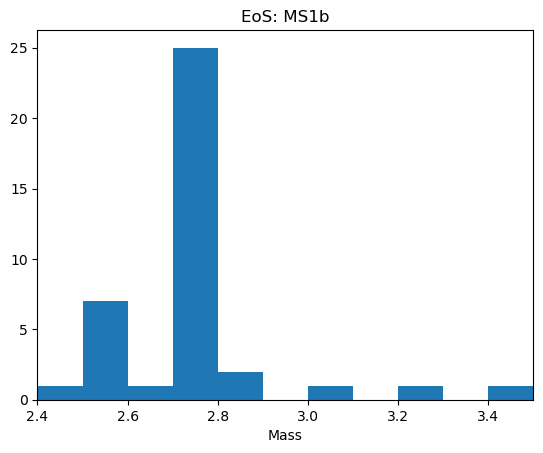

Number of sims: 24


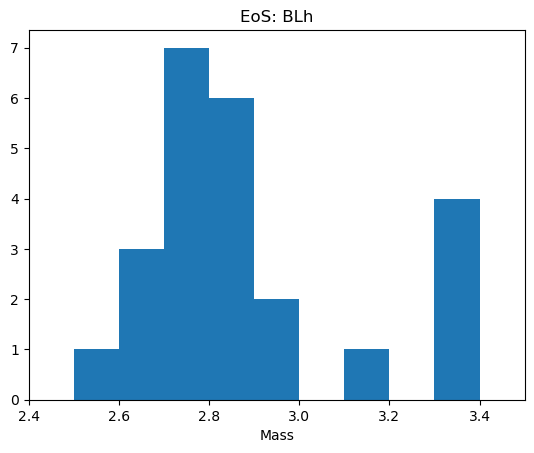

Number of sims: 23


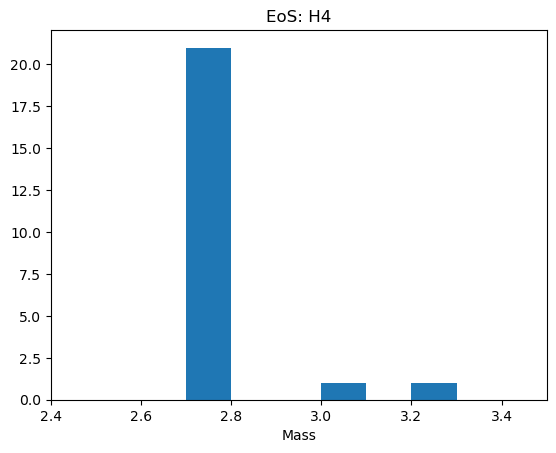

Number of sims: 19


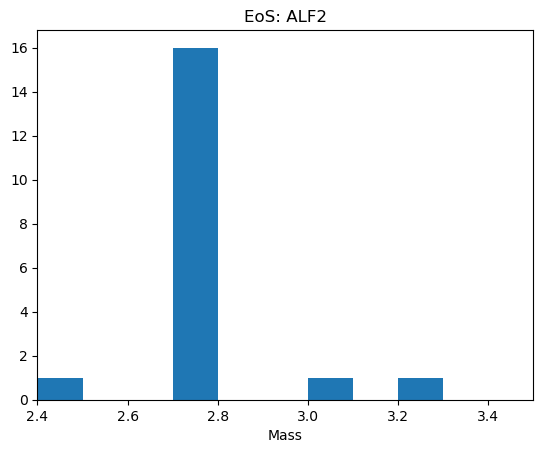

Number of sims: 18


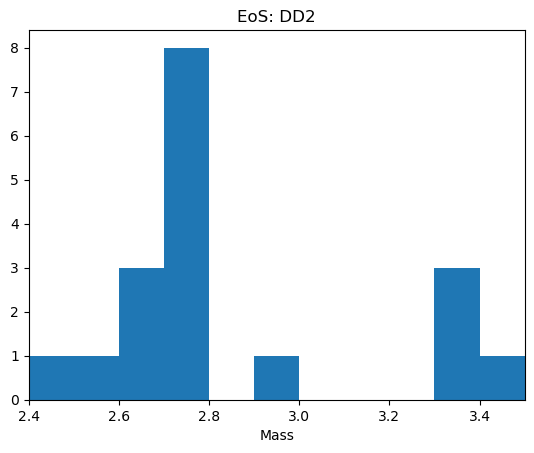

Number of sims: 17


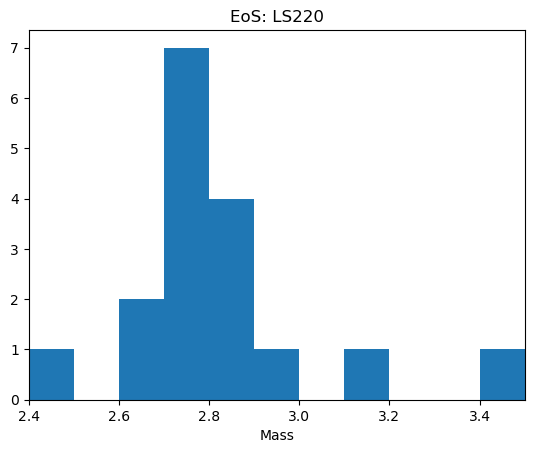

Number of sims: 16


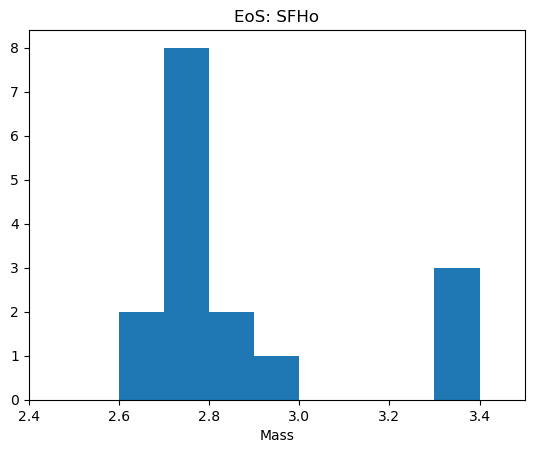

In [8]:
eos_list = ['SLy', 'MS1b', 'BLh', 'H4', 'ALF2', 'DD2', 'LS220', 'SFHo']

# Masses distribution for each selected EoS
for eos in eos_list:
    md = cdb[cdb['id_eos'] == eos]
    print(f"Number of sims: {len(md)}")
    masses = md['id_mass']
    
    fig, ax = plt.subplots()
    hist, ticks, _ = ax.hist(masses, bins=np.arange(2.4, 3.6, 0.1))
    ax.set_xlim(2.4, 3.5)
    ax.set_xlabel('Mass')
    ax.set_title(f'EoS: {eos}')
    plt.show()

# Download and Explore SLy

In [9]:
md = cdb[cdb['id_eos'] == 'SLy']
dbkeys = list(md.index)

In [10]:
# Download sim data if not already present:
cdb.download_strains(dbkeys, lfs=True)

  0%|          | 0/50 [00:00<?, ?it/s]

BAM:0095 already downloaded, skipping.
BAM:0096 already downloaded, skipping.
BAM:0097 already downloaded, skipping.
BAM:0098 already downloaded, skipping.
BAM:0099 already downloaded, skipping.
BAM:0100 already downloaded, skipping.
BAM:0101 already downloaded, skipping.
BAM:0102 already downloaded, skipping.
BAM:0103 already downloaded, skipping.
BAM:0104 already downloaded, skipping.
BAM:0105 already downloaded, skipping.
BAM:0106 already downloaded, skipping.
BAM:0107 already downloaded, skipping.
BAM:0108 already downloaded, skipping.
BAM:0109 already downloaded, skipping.
BAM:0110 already downloaded, skipping.
BAM:0111 already downloaded, skipping.
BAM:0112 already downloaded, skipping.
BAM:0113 already downloaded, skipping.
BAM:0114 already downloaded, skipping.
BAM:0115 already downloaded, skipping.
BAM:0116 already downloaded, skipping.
BAM:0117 already downloaded, skipping.
BAM:0118 already downloaded, skipping.
BAM:0119 already downloaded, skipping.
BAM:0120 already download

## Check distribution of (m, q)

In [19]:
md_sly = cdb[cdb['id_eos']=='SLy']

m_points = md_sly['id_mass']
q_points = md_sly['id_mass_ratio']

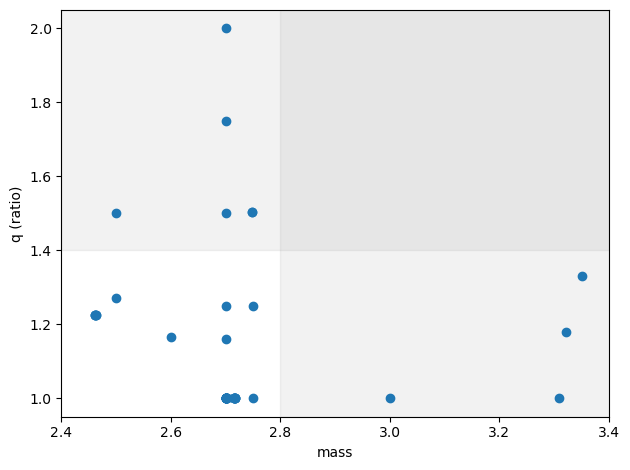

In [20]:
fig, ax = plt.subplots()

ax.scatter(m_points, q_points, zorder=2)
# Mass limit
ax.axvspan(2.8, 4, color='gray', alpha=0.1)
# Ratio limit
ax.axhspan(1.4, 3, color='gray', alpha=0.1)

ax.set_xlim(2.4, 3.4)
ax.set_ylim(0.95, 2.05)
ax.set_xlabel('mass')
ax.set_ylabel('q (ratio)')
fig.tight_layout()

## Search for id_mass limit

Upper limit to ensure no collapse, so there is a bounce in the gw data.

**First look at the highest masses**

In [13]:
md_sly.sort_values('id_mass', ascending=False).iloc[:4][['id_mass', 'id_mass_ratio']]

,id_mass,id_mass_ratio
THC:0050,3.351000,1.33
THC:0075,3.322000,1.18
THC:0051,3.308000,1.00
BAM:0125,3.000475,1.00


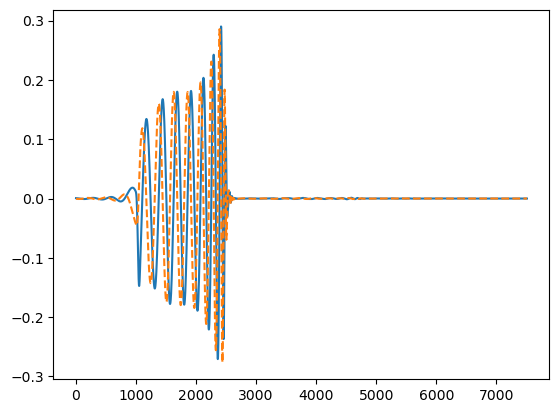

In [14]:
skey = 'BAM:0125'

gw_data = cdb.load_sim(skey)
t, hp, hx = gw_data[:,[-1,1,2]].T

fig, ax = plt.subplots()
ax.plot(t, hp)
ax.plot(t, hx, ls='--')

Efectivament, aquesta col·lapsa sense bounce.

## Search for assymmetric limit

In the bibliography says q ~> 1.4

**So we first look for the most extreme case**

In [21]:
md_sly.sort_values('id_mass_ratio', ascending=False).iloc[:4][['id_mass', 'id_mass_ratio']]

,id_mass,id_mass_ratio
BAM:0130,2.700222,2.000037
BAM:0131,2.700133,1.750025
BAM:0127,2.747904,1.502906
BAM:0128,2.747904,1.502906


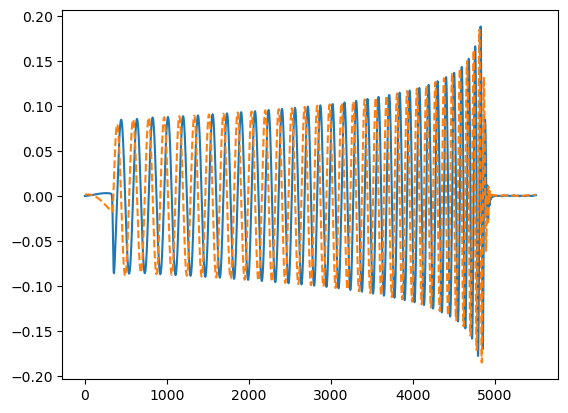

In [22]:
skey = 'BAM:0130'

gw_data = cdb.load_sim(skey)
t, hp, hx = gw_data[:,[-1,1,2]].T

fig, ax = plt.subplots()
ax.plot(t, hp)
ax.plot(t, hx, ls='--')

Efectivament, malgrat tindre massa total de 2.7 (dins el limit), col·lapsa.

Hi ha encara bounce en algunes de q > 1.4 però ixen coses rares de vegades. Possiblement el més segur siga descartar totes les que estiguen per damunt.

# Download and Explore MS1b

In [4]:
md = cdb[cdb['id_eos'] == 'MS1b']
dbkeys = list(md.index)

In [6]:
# Download sim data if not already present:
cdb.download_strains(dbkeys, lfs=True)

  0%|          | 0/39 [00:00<?, ?it/s]

BAM:0062 already downloaded, skipping.
BAM:0063 already downloaded, skipping.
BAM:0064 already downloaded, skipping.
BAM:0065 already downloaded, skipping.
BAM:0066 already downloaded, skipping.
BAM:0067 already downloaded, skipping.
BAM:0068 already downloaded, skipping.
BAM:0069 already downloaded, skipping.
BAM:0070 already downloaded, skipping.
BAM:0071 already downloaded, skipping.
BAM:0072 already downloaded, skipping.
BAM:0073 already downloaded, skipping.
BAM:0074 already downloaded, skipping.
BAM:0075 already downloaded, skipping.
BAM:0076 downloaded.
git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/BAM_0077.git ...
BAM:0077 downloaded.
git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/BAM_0078.git ...
BAM:0078 downloaded.
git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/BAM_0079.git ...
BAM:0079 downloaded.
git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/BAM_0080.git ...
BAM:0080 downloaded.
git-clone https://core-gitlfs.tpi.uni-jen

## Check distribution of (m, q)

In [7]:
md_ms1b = cdb[cdb['id_eos']=='MS1b']

m_points = md_ms1b['id_mass']
q_points = md_ms1b['id_mass_ratio']

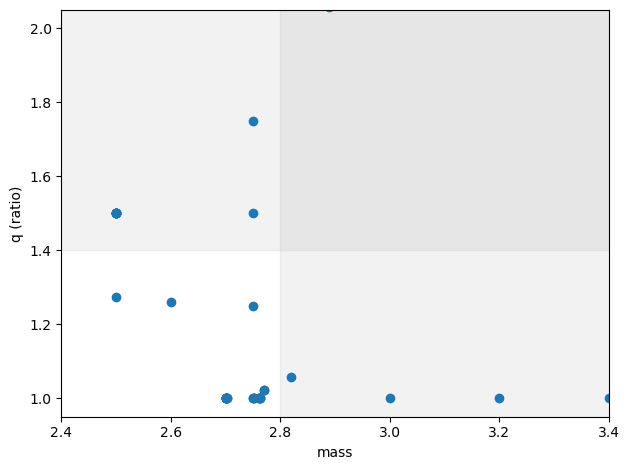

In [8]:
fig, ax = plt.subplots()

ax.scatter(m_points, q_points, zorder=2)
# Mass limit
ax.axvspan(2.8, 4, color='gray', alpha=0.1)
# Ratio limit
ax.axhspan(1.4, 3, color='gray', alpha=0.1)

ax.set_xlim(2.4, 3.4)
ax.set_ylim(0.95, 2.05)
ax.set_xlabel('mass')
ax.set_ylabel('q (ratio)')
fig.tight_layout()

# Try filtering out the chosen EoS

Let's see how many remaining samples we get for each EoS.

---------------------
SLy
Original: 50
Remaining: 46


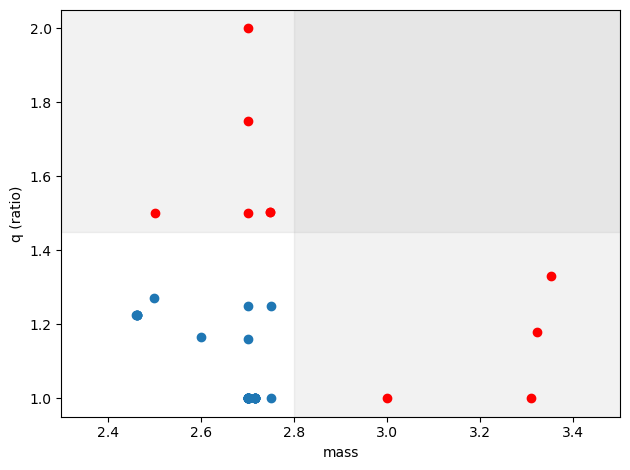

---------------------
MS1b
Original: 39
Remaining: 46


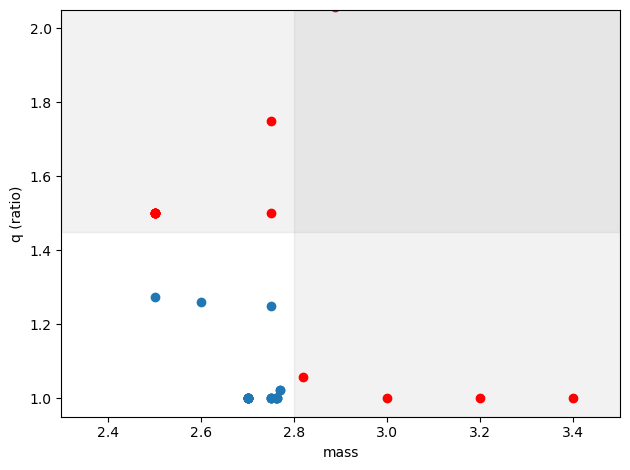

---------------------
BLh
Original: 24
Remaining: 46


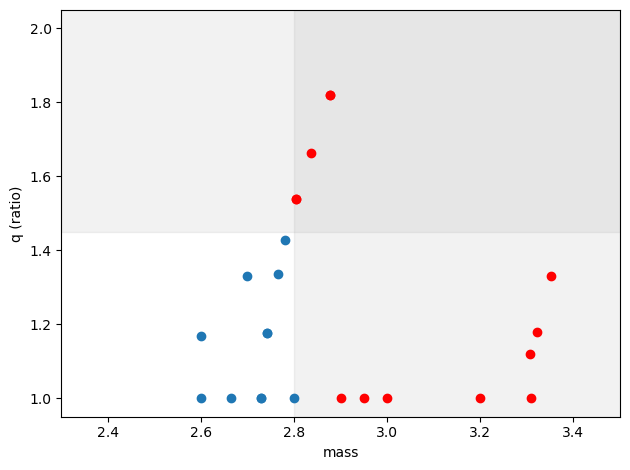

---------------------
H4
Original: 23
Remaining: 46


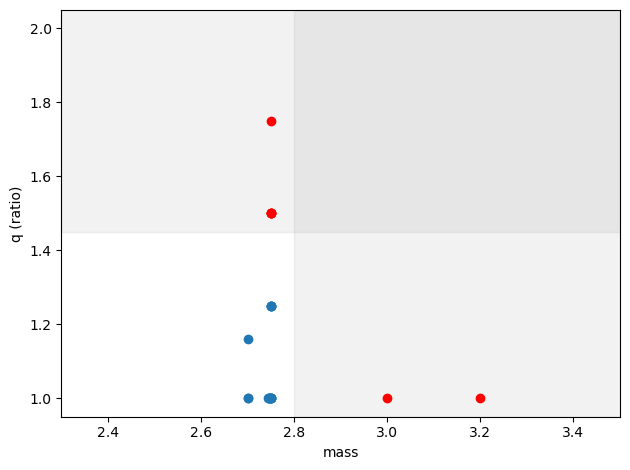

---------------------
ALF2
Original: 19
Remaining: 46


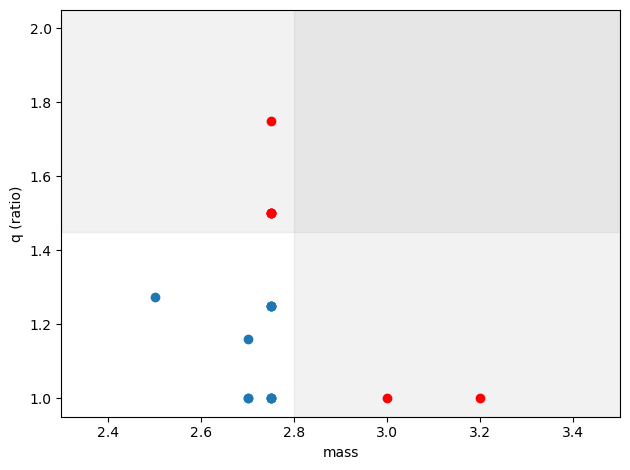

---------------------
DD2
Original: 18
Remaining: 46


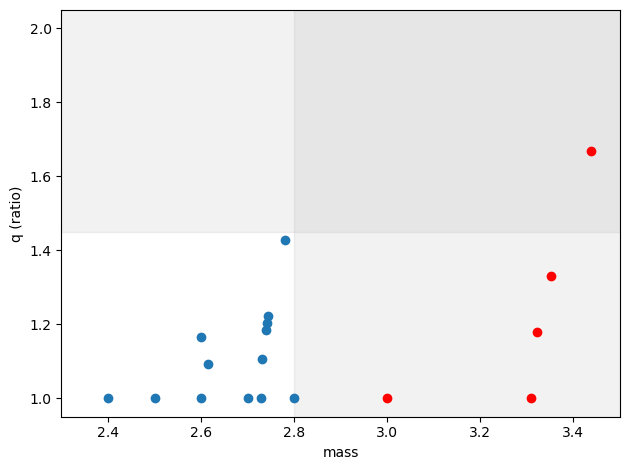

---------------------
LS220
Original: 17
Remaining: 46


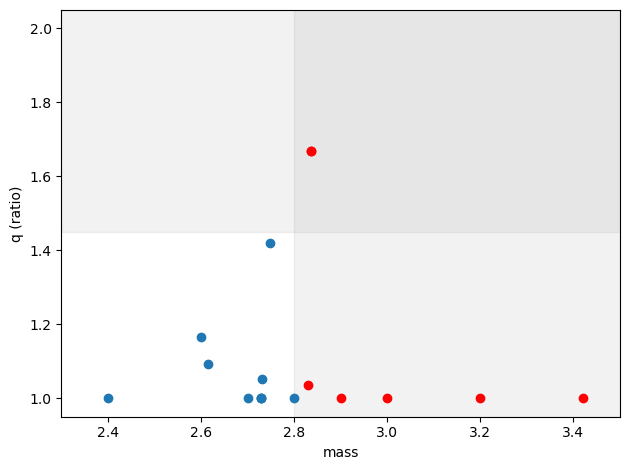

---------------------
SFHo
Original: 16
Remaining: 46


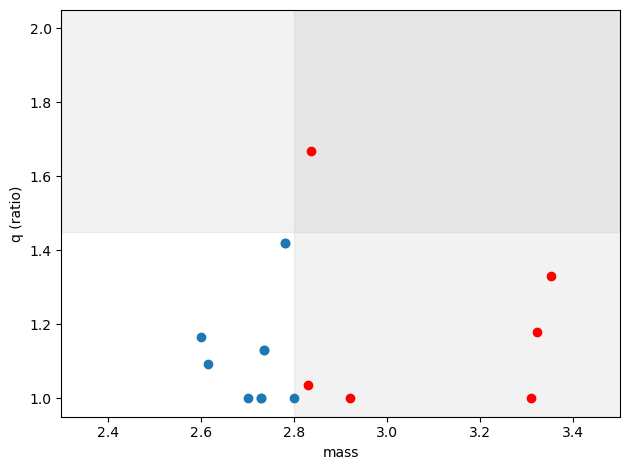

In [29]:
m_max = 2.8
q_max = 1.45

for eos in eos_list:
    md = cdb[cdb['id_eos']==eos]
    masses = md['id_mass']
    ratios = md['id_mass_ratio']

    md_oki = md[(masses <= m_max) & (ratios <= q_max)]
    md_del = md[(masses > m_max) | (ratios > q_max)]

    print('---------------------')
    print(eos)
    print("Original:", len(md))
    print("Remaining:", len(m_oki))

    # Plot (m, q) space
    fig, ax = plt.subplots()

    ax.scatter(md_oki['id_mass'], md_oki['id_mass_ratio'], zorder=2)
    ax.scatter(md_del['id_mass'], md_del['id_mass_ratio'], zorder=2, color='red')
    # Mass limit
    ax.axvspan(m_max, 4, color='gray', alpha=0.1)
    # Ratio limit
    ax.axhspan(q_max, 3, color='gray', alpha=0.1)
    
    ax.set_xlim(2.3, 3.5)
    ax.set_ylim(0.95, 2.05)
    ax.set_xlabel('mass')
    ax.set_ylabel('q (ratio)')
    fig.tight_layout()
    plt.show()

# Plot to disk all waveforms from selected EoS

In [9]:
eos_list = ['SLy', 'MS1b']
path = Path('../../plots/')
filetmp = '{skey}.jpg'
dpi = 300

plt.ioff()

total_sims = sum([sum(cdb['id_eos']==eos) for eos in eos_list])
pbar = tqdm(total=total_sims)

for eos in eos_list:
    p = path / eos
    p.mkdir(parents=True, exist_ok=True)
    skey_list = cdb.filter_by('id_eos', eos).index
    for skey in skey_list:
        t, hre, him = cdb.load_sim(skey).T[[-1, 1, 2]]
        m = cdb.metadata.loc[skey]['id_mass']
        q = cdb.metadata.loc[skey]['id_mass_ratio']
        ecc = next(iter(cdb.downloaded[skey].values()))['eccentricity']
        r = next(iter(cdb.downloaded[skey].values()))['r_extraction']
        ofile = p / filetmp.format(skey=skey)
        
        fig, ax = plt.subplots()
        ax.plot(t, hre, lw=1, label='Re(h)')
        ax.plot(t, him, ls='--', lw=1, label='Im(h)')
        ax.legend(loc='upper right')
        ax.set_xlabel("Time")
        ax.set_ylabel("Rh_22")
        ax.set_title(f"m={m:.3f}, q={q:.3f}, ecc={ecc:.2e}, r={r}")
        fig.tight_layout()
        fig.savefig(ofile, dpi=dpi)
        plt.close(fig)

        pbar.update()

plt.ion()

  0%|          | 0/89 [00:00<?, ?it/s]